In [40]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.animation as animation
import time
import struct
import tensorflow as tf

from array import array
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression

# my project
from module.conf import PROJECT_DIR

# %matplotlib tk
%matplotlib inline


1. Load data:
- Train data: 60k 28x28 images
- Test data: 

In [41]:
mnist_path = "/data/sample/mnist"
training_images_filepath = "".join([PROJECT_DIR, mnist_path, "/train-images.idx3-ubyte"])
training_labels_filepath = "".join([PROJECT_DIR, mnist_path, "/train-labels.idx1-ubyte"])
test_images_filepath = "".join([PROJECT_DIR, mnist_path, "/t10k-images.idx3-ubyte"])
test_labels_filepath = "".join([PROJECT_DIR, mnist_path, "/t10k-labels.idx1-ubyte"])

def read_images_labels(images_filepath, labels_filepath) -> tuple:
    labels = []
    with open(labels_filepath, 'rb') as file:
        magic, size = struct.unpack(">II", file.read(8))
        if magic != 2049:
            raise ValueError('Magic number mismatch, expected 2049, got {}'.format(magic))
        # labels = array("B", file.read())
        labels = array("B", file.read())

    with open(images_filepath, 'rb') as file:
        magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
        if magic != 2051:
            raise ValueError('Magic number mismatch, expected 2051, got {}'.format(magic))
        image_data = array("B", file.read())       
     
    images = []
    for i in range(size):
        images.append([0] * rows * cols)
    for i in range(size):
        img = np.array(image_data[i * rows * cols:(i + 1) * rows * cols])
        img = img.reshape(28, 28)
        images[i][:] = img
        # images.append(img)
    
    return images, labels

def load_data() -> tuple:
    x_train, y_train = read_images_labels(training_images_filepath, training_labels_filepath)
    x_test, y_test = read_images_labels(test_images_filepath, test_labels_filepath)
    return (x_train, y_train),(x_test, y_test)

(X_train, y_train), (X_test, y_test) = load_data()

In [42]:
# print(f"{type(X_train[0])}")
# mnist = tf.keras.datasets.mnist

# (x_train, y_train), (x_test, y_test) = mnist.load_data()


In [54]:
X_train = np.asarray(X_train)/255
y_train = np.asarray(y_train)
X_test  = np.asarray(X_test)/255
y_test  = np.asarray(y_test)

In [62]:
model = tf.keras.models.Sequential(layers=[
    tf.keras.layers.Flatten(input_shape=(28, 28,)),
    tf.keras.layers.Dense(units=128, activation="relu"),
    # tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(units=10)
])

In [45]:
# predictions = model(X_train[0]).numpy()
# predictions
# tf.nn.softmax(predictions).numpy()

In [63]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
# model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(), tf.keras.metrics.FalseNegatives()])

In [64]:
# X_train, X_test = np.asarray(X_train) / 255.0, np.asarray(X_test) / 255.0
# print(X_test)
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 1s 669us/step - loss: 0.2570 - accuracy: 0.9259
Epoch 2/5
1875/1875 [==============================] - 1s 682us/step - loss: 0.1142 - accuracy: 0.9666
Epoch 3/5
1875/1875 [==============================] - 1s 648us/step - loss: 0.0785 - accuracy: 0.9765
Epoch 4/5
1875/1875 [==============================] - 1s 670us/step - loss: 0.0576 - accuracy: 0.9824
Epoch 5/5
1875/1875 [==============================] - 1s 660us/step - loss: 0.0447 - accuracy: 0.9860


In [69]:
x_test = np.asarray([X_test[45]])
# model.evaluate(X_test,  y_test, verbose=2)
result = model.predict(x=x_test)

print(f"{result} {y_test[45]}")

1/1 [==============================] - 0s 14ms/step
[[-6.471623  -7.7331724 -8.416843  -1.6690154 -9.734266   8.672478
  -1.9725685 -9.449227  -1.6845248 -3.6372259]] 5


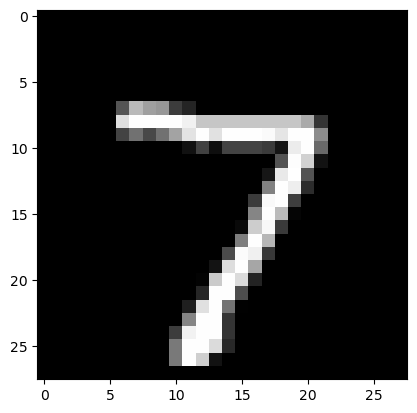

In [61]:
def show_image(img_data: np.ndarray) -> tuple:
    fig, axes = plt.subplots()
    axes.imshow(X=img_data, cmap="gray")
    return fig, axes

show_image(X_test[0])
plt.show()